## <span style="color:orange;"><u><h3>WELCOME TO THE INTRODUCTION TO PYTHON FOR DS SERIES VISUALIZATION : S003 PART B</h3></u></span>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df=pd.read_csv("SOO3_DATA.csv")

In [4]:
df[:4]

,Order_ID,Product_Category,Region,Sales_Amount,Profit,Quantity,Discount,Customer_Segment,Order_Date,Payment_Method,Delivery_Status
0,1001,Appliances,West,1605,89.32,4,0.02,Corporate,2023-08-28,Bank Transfer,Cancelled
1,1002,Clothing,Central,286,69.35,11,0.08,Small Business,2023-10-07,Bank Transfer,Shipped
2,1003,Sports,East,1469,111.33,12,0.04,Individual,2023-02-11,Bank Transfer,Delivered
3,1004,Toys,South,1932,176.94,20,0.21,Small Business,2023-04-15,Credit Card,Pending


### the process belOw here is to make ploting timelines possible hence i create columns for yearmonth and months specifically

In [6]:
# Ensure Order_Date is datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
# Extract Year-Month from Order_Date
df['YearMonth'] = df['Order_Date'].dt.to_period('M').astype(str)
# Extract month
df['Month'] = df['Order_Date'].dt.month

In [7]:
df[:2]

,Order_ID,Product_Category,Region,Sales_Amount,Profit,Quantity,Discount,Customer_Segment,Order_Date,Payment_Method,Delivery_Status,YearMonth,Month
0,1001,Appliances,West,1605,89.32,4,0.02,Corporate,2023-08-28,Bank Transfer,Cancelled,2023-08,8
1,1002,Clothing,Central,286,69.35,11,0.08,Small Business,2023-10-07,Bank Transfer,Shipped,2023-10,10


In [111]:
df.describe()

,Order_ID,Sales_Amount,Profit,Quantity,Discount,Order_Date,Month
count,60.000000,60.000000,60.000000,60.000000,60.000000,60,60.000000
mean,1030.500000,1170.883333,220.164333,13.183333,0.147833,2023-06-21 07:36:00,6.200000
min,1001.000000,202.000000,47.260000,1.000000,0.000000,2023-01-11 00:00:00,1.000000
25%,1015.750000,895.750000,110.050000,5.750000,0.070000,2023-03-30 00:00:00,3.000000
50%,1030.500000,1253.500000,190.200000,13.000000,0.140000,2023-06-13 00:00:00,6.000000
75%,1045.250000,1509.750000,305.467500,21.000000,0.240000,2023-09-15 18:00:00,9.000000
max,1060.000000,1938.000000,549.900000,25.000000,0.300000,2023-12-21 00:00:00,12.000000
std,17.464249,502.588759,130.985037,7.654602,0.094261,NaN,3.318158


In [113]:
df=df.dropna()

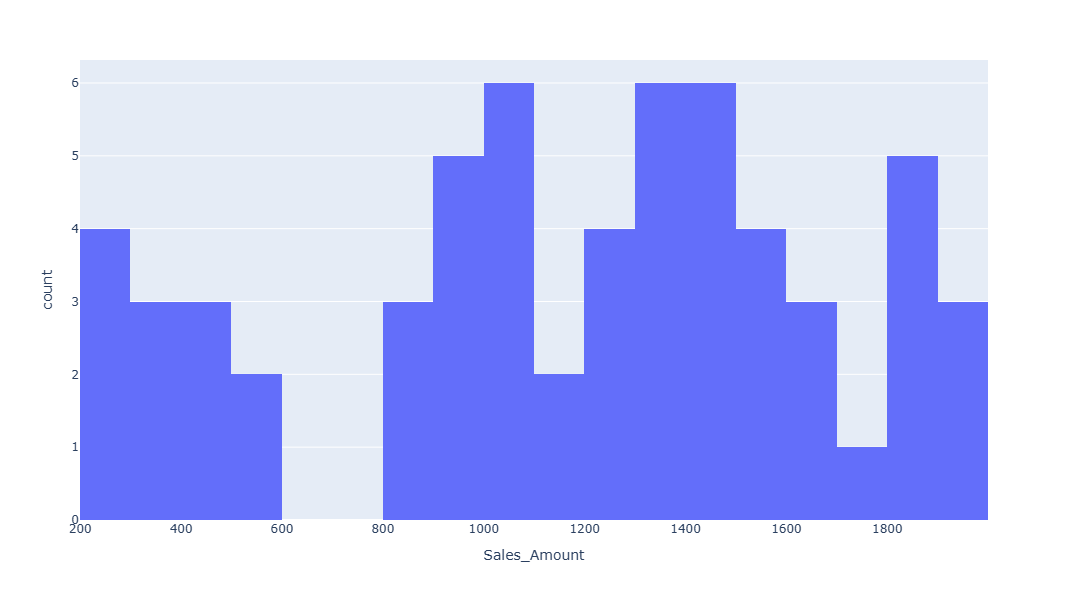

In [115]:
#Plot a histogram of the Sales_Amount column.
hist1=px.histogram(df,x="Sales_Amount",nbins=30,width=1000,height=600)
hist1.show()

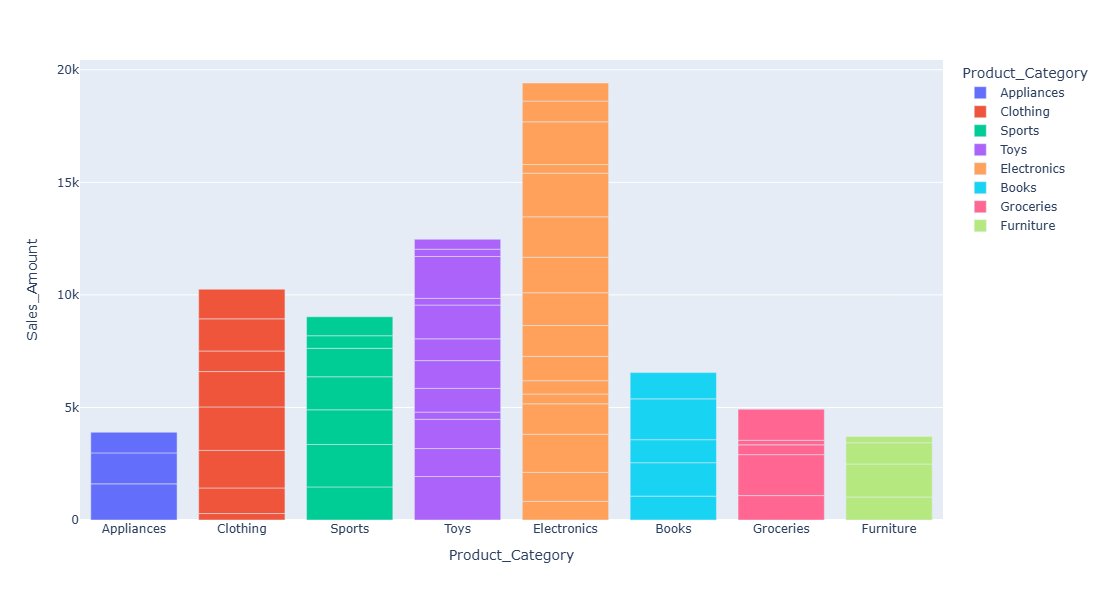

In [9]:
#Create a bar chart showing the total sales for each Product_Category.
px.bar(df, x="Product_Category", y="Sales_Amount",labels={"x_column_name": "Y column name"},color="Product_Category",width=1000,height=600)

In [10]:
#Visualize the distribution of Profit using a box plot.
px.box(df,x="Profit",notched=True, points="all")

In [11]:
#Plot a pie chart showing the proportion of sales by Region.
px.pie(df, names="Region", values="Sales_Amount",width=600,height=500)

In [12]:
#Create a line plot of total sales over time (using Order_Date).
# Extract Year-Month from Order_Date
df['YearMonth'] = df['Order_Date'].dt.to_period('M').astype(str)

# Group by Year-Month and sum Sales
monthly_sale= df.groupby('YearMonth')['Sales_Amount'].sum().reset_index()
#If you don’t reset the index, Order_Date is not a column — it’s part of the index. So:type(df.groupby("Order_Date")["Sales_Amount"].sum())

# Line Plot
px.line(monthly_sale,x='YearMonth',y='Sales_Amount',title='Monthly Total Sales Over Time',
    labels={'YearMonth': 'Month', 'Sales_Amount': 'Total Sales'}, width=1000,height=600,template='plotly_white')

In [13]:
#Plot a scatter plot between Sales_Amount and Profit.
px.scatter(df, x="Sales_Amount", y="Profit", color="Sales_Amount", width=1000, height=800)

In [14]:
#Visualize the distribution of Quantity using a histogram.
px.histogram(df,x="Quantity", nbins=20, color="Quantity",width=1000, height=800)

In [15]:
#Plot a stacked bar chart showing sales by Region and Product_Category.
px.bar(df,x="Sales_Amount", y=["Region","Product_Category"],
    barmode='group',  # Ensures bars are side-by-side (clustered)
    title=" stacked bar chart showing sales by Region and Product_Category.")

In [16]:
#Visualize the correlation between numeric columns using a heatmap.
px.density_heatmap(df.corr(numeric_only=True),width=800, height=600)

In [17]:
#Create a pair plot for all numeric columns (Sales_Amount, Profit, Quantity, Discount)
px.scatter_matrix(df,
    dimensions=["Sales_Amount", "Profit","Quantity", "Discount"],  # numeric columns
    color="Order_ID",  # Optional: Add color by a categorical column
    title="Scatter Matrix (Pairplot)",
    height=700,
    width=900)

In [18]:
#create a violin plot for sales_amount by region
px.violin(df, x='Sales_Amount', y='Region', color='Region', width=800, height=600)

In [19]:
#Create a grouped bar chart comparing Sales_Amount and Profit by Product_Category.
#px.bar(df, x=["Sales_Amount", "Profit"], y="Product_Category",width=1000, height=800)
px.bar(df,
x=["Sales_Amount", "Profit"],
y="Product_Category",
barmode="group",
title="Grouped Bar Chart",width=1000, height=800)

In [20]:
#Visualize the cumulative sales over time using a line plot.
sum_sales_overtime= df.groupby('YearMonth')['Sales_Amount'].sum().reset_index()
px.line( sum_sales_overtime, x='YearMonth', y='Sales_Amount', width=1000, height=800)

In [21]:
#Plot a bubble chart where the size of the bubble represents Quantity and the x-axis is Sales_Amount.
px.scatter(df, x='Sales_Amount', size='Quantity', color='Quantity',width=800, height=600)

In [22]:
#Create a heatmap showing the average Profit by Region and Product_Category.
px.density_heatmap(df,x='Region', y='Product_Category', z='Profit', histfunc='avg', title='The average Profit by Region and Product_Category',
width=800, height=600)

In [23]:
#Visualize the trend of Discount over time using a line plot.

# Group by Year-Month and sum of discount
monthly_discount = df.groupby('YearMonth')['Discount'].sum().reset_index()
# Line Plot
px.line(
    monthly_discount,
    x='YearMonth',
    y='Discount',
    title='Discount over time specifically using Year and Month',
    labels={"x_column_name": "Y column name"},
    width=1000,
    height=800,)

In [24]:
#Plot a bar chart showing the top 10 most profitable orders.
top_10=df.groupby('Order_ID')['Profit'].sum().nlargest(10).reset_index()
px.bar(top_10, x='Order_ID', y='Profit', color='Order_ID', width=800, height=600)

In [25]:
#Create a donut chart showing the proportion of sales by Customer_Segment.
px.pie(df, names="Customer_Segment", values="Sales_Amount", hole=0.5)

In [26]:
#Visualize the distribution of Sales_Amount by Region using a swarm plot.
px.swarm?

Object `px.swarm` not found.


### ADVANCED

In [28]:
#Plot the monthly total sales over time.
px.bar(df, x="Month", y='Sales_Amount', color="Month", width=800, height=600)

In [29]:
#Visualize the quarterly average profit over time

In [30]:
#Create a line plot showing the daily sales trend.
plt.figure(figsize=(10,8))
px.line(df, x="Order_Date", y='Sales_Amount', width=1000, height=800)

<Figure size 1000x800 with 0 Axes>

In [31]:
#Plot the cumulative profit over time.
#cum_pro_tm=df.groupby("Month")["Profit"].sum().reset_index()
px.bar(df, x="Month",y="Profit",width=800,color="Profit", height=600)

In [32]:
#Visualize the monthly sales for each Product_Category using subplots.
#px.subplots.make_subplots?

In [33]:
#Create a heatmap showing sales by month and Region.
px.density_heatmap(df, x='Region', y='Month', z='Sales_Amount',histfunc='sum', title='The sales by month and Region',
width=800, height=600)

In [34]:
#Plot the moving average of Sales_Amount over time.

In [35]:
#Visualize the seasonality of sales using a line plot.
season_sales=df.groupby('Month')['Sales_Amount'].sum().reset_index()
px.line(season_sales, x='Month', y='Sales_Amount', width=800, height=600)

In [36]:
#Create a bar chart showing the total sales for each month.
px.bar(df, x='Month', y='Sales_Amount', color='Month', width=800, height=600)

In [37]:
#Plot the year-over-year growth in sales.
px.bar(df, x='YearMonth', y='Sales_Amount', color='YearMonth', width=800, height=600)

### Customizations

In [39]:
#Add a title and labels to a bar chart showing sales by Region.
px.bar(df, y='Sales_Amount', x='Region', color='Region', title=' bar chart showing sales by Region', 
        labels={"x_column_name": "y_column_name"},
       width=1000, height=800)

In [40]:
#Customize the color palette of a pie chart showing sales by Product_Category.
px.pie(df, names='Product_Category', values='Sales_Amount',
       title=' pie chart showing sales by Product_Category', 
       width=800, height=600)

In [41]:
#Add annotations to a scatter plot between Sales_Amount and Profit.
px.scatter(df, x="Sales_Amount", y="Profit", color="Profit", width=1000, height=800)

In [42]:
#change the style of a line plot to make it more visually appealing.
#Create a line plot of total sales over time (using Order_Date).
fig2 = px.line(monthly_sale,x='YearMonth',y='Sales_Amount',title='Monthly Total Sales Over Time',
    labels={'Month': 'Month', 'Sales_Amount': 'Total Sales'},
    width=1000,height=600,template='plotly_white')

fig2.update_traces(line=dict(color='black', width=7))
fig2.update_layout(xaxis_tickangle=-45)
fig2.show()

In [43]:
#Add a legend to a grouped bar chart comparing Sales_Amount and Profit.
new_look=df.groupby("Sales_Amount")["Profit"].sum().reset_index()

px.bar(new_look, x="Sales_Amount", y="Profit",
    barmode='group',
    title="bar chart comparing Sales_Amount and Profit.",
    width=1000, height=800)

### Customize the x-axis and y-axis labels of a histogram.

In [45]:
#Plot a histogram of the Sales_Amount column.
px.histogram(df,x="Sales_Amount",color="Sales_Amount",title='histogram of the Sales_Amount column',
             nbins=30,width=1000,height=600)

In [46]:
#Add a grid to a box plot for better readability.
#bar plot for 'Product_Category' against the 'Sales_Amount'

px.bar(df, x='Product_Category', y='Sales_Amount',color="Product_Category", animation_frame='Month',width=800, height=600)


In [47]:
#Rotate the x-axis labels of a bar chart for better visibility.

In [48]:
#Add a trendline to a scatter plot.

In [49]:
#Customize the size and aspect ratio of a heatmap.

### Bonus Questions

In [51]:
#Create a dashboard-like visualization using subplots to show multiple charts (e.g., sales, profit, and quantity trends).

In [52]:
#Visualize the top 5 most profitable products using a horizontal bar chart.
pro_5=df.groupby("Product_Category")["Sales_Amount"].sum().nlargest(5).reset_index()
px.bar(pro_5, x="Product_Category", y="Sales_Amount", color="Product_Category", width=1000, height=800)

In [53]:
#Plot the distribution of Discount by Region using a plotly boxplot
px.box(df, x='Discount', y='Region', color='Region',title='The distribution of Discount by Region using a plotly boxplot',
       labels={'x_column_name', 'y_column_name'},
       width=1000, height=800)

In [54]:
#Create a dual-axis plot showing Sales_Amount and Profit over time.

In [55]:
#Visualize the relationship between Quantity and Profit using a plotly scatterplot with colr as Product_Category.
px.scatter(df, x='Quantity', y='Profit', color='Product_Category',title='The relationship between Quantity and Profit',
       labels={'x_column_name', 'y_column_name'},
       width=1000, height=800)

## <span style="color:orange;"><u><h2>THANK YOU 😎🎉 BYE 😎🎉</h2></u></span>